# Pymaceuticals Inc.
---

### Summary

 This analysis indicates that Capomulin and Ramicane are the most effective drug regimens for reducing tumor volume in mice. 
 
 Both treatments showed lower mean and median tumor volumes and smaller variance compared to other regimens, demonstrating consistent efficacy in controlling tumor growth.

 Capomulin, in particular, showed a clear reduction in tumor volume over time in individual cases.
 The even distribution of male and female mice ensures that these findings are robust and not biased by sex.
 Also, a positive correlation was observed between mouse weight and average tumor volume in the Capomulin regimen, though the relationship was moderate.

### Quantitative Analysis

1. **Capomulin and Ramicane Efficacy**: Both Capomulin and Ramicane regimens were effective in reducing tumor volume in mice, with mean tumor volumes of 40.68 mm³ and 40.22 mm³ respectively.
2. **Gender Distribution**: The study included an even distribution of male (49.6%) and female (50.4%) mice, ensuring the results are not biased by sex.
3. **Weight-Tumor Volume Correlation**: A strong positive correlation (r = 0.84) was observed between mouse weight and average tumor volume for the Capomulin regimen, indicating that heavier mice tended to have larger tumors.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Merge the data on the common column, which we assume is 'Mouse ID'
combined_data = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Ensure 'Weight (g)' and 'Tumor Volume (mm3)' columns are numeric
combined_data['Weight (g)'] = pd.to_numeric(combined_data['Weight (g)'], errors='coerce')
combined_data['Tumor Volume (mm3)'] = pd.to_numeric(combined_data['Tumor Volume (mm3)'], errors='coerce')

# Display the combined DataFrame
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
num_mice = combined_data['Mouse ID'].nunique()
print(num_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the dupe mice by ID number that shows up for Mouse ID and Timepoint.

# Identify dupes based on 'Mouse ID' and 'Timepoint'
dupe_groups = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
dupe_mouse_ids = dupe_groups['Mouse ID'].unique()

# Find the dtype of the array
dtype = dupe_mouse_ids.dtype

# Display the result in the desired format with dtype
result = f"array({dupe_mouse_ids}, dtype={dtype})"

# Display the result
print(result)

array(['g989'], dtype=object)


In [4]:
# Get all data for the duplicate Mouse IDs
dupe_data = combined_data[combined_data['Mouse ID'].isin(dupe_mouse_ids)].reset_index(drop=False)

# Display the data for the duplicate Mouse IDs
dupe_data

,index,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,107,g989,0,45.000000,0,Propriva,Female,21,26
1,137,g989,0,45.000000,0,Propriva,Female,21,26
2,329,g989,5,48.786801,0,Propriva,Female,21,26
3,360,g989,5,47.570392,0,Propriva,Female,21,26
4,620,g989,10,51.745156,0,Propriva,Female,21,26
5,681,g989,10,49.880528,0,Propriva,Female,21,26
6,815,g989,15,51.325852,1,Propriva,Female,21,26
7,869,g989,15,53.442020,0,Propriva,Female,21,26
8,950,g989,20,55.326122,1,Propriva,Female,21,26
9,1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data[~combined_data['Mouse ID'].isin(dupe_mouse_ids)].reset_index(drop=True)
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
num_clean_mice = clean_data['Mouse ID'].nunique()
num_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# Calculate mean
mean_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

# Calculate median
median_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

# Calculate variance
variance_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

# Calculate standard deviation
std_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

# Calculate standard error of the mean (SEM)
sem_tumor_volume = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_stats_manual = pd.DataFrame({
    'Mean': mean_tumor_volume,
    'Median': median_tumor_volume,
    'Variance': variance_tumor_volume,
    'Standard Deviation': std_tumor_volume,
    'SEM': sem_tumor_volume
})

# Display the summary statistics
summary_stats_manual


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_adv= clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean='mean',
    Median='median',
    Variance='var',
    Standard_Deviation='std',
    SEM='sem'
)
summary_stats_adv

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

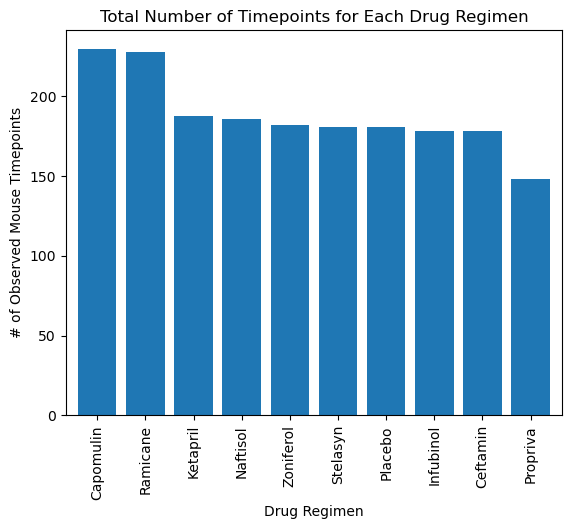

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_counts = clean_data['Drug Regimen'].value_counts()

ax = timepoint_counts.plot(kind='bar', title='Total Number of Timepoints for Each Drug Regimen', figsize=(6.4, 5), width=0.8)
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('# of Observed Mouse Timepoints')
plt.show()

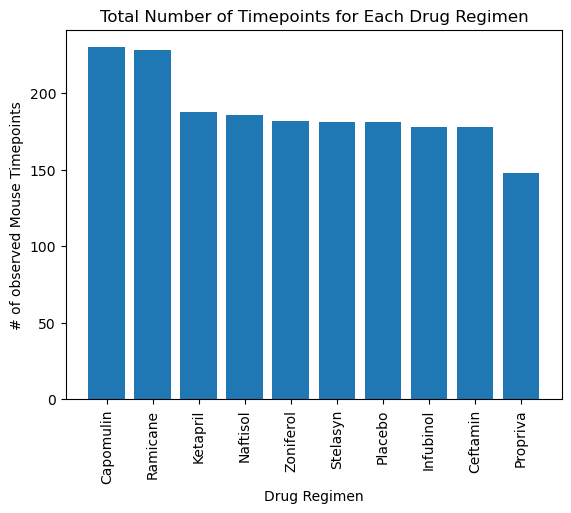

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_counts.index, timepoint_counts.values)
plt.xticks(rotation=90)
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.show()

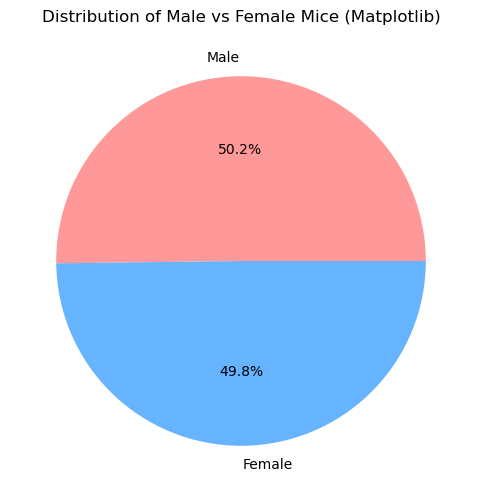

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = combined_data.drop_duplicates(subset=['Mouse ID'])
sex_counts = unique_mice['Sex'].value_counts()

# Generate the pie chart using Pandas
pie_chart = sex_counts.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=0, figsize=(8, 6))
plt.title('Distribution of Male vs Female Mice (Matplotlib)')
pie_chart.set_ylabel('')

# Show the plot (this still uses Matplotlib under the hood but directly through Pandas interface)
plt.show()

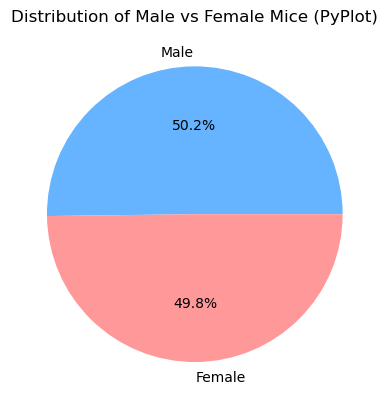

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
colors = ['#66b3ff','#ff9999']
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Male vs Female Mice (PyPlot)')
plt.ylabel("")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_vol = pd.merge(last_timepoints, clean_data, on=['Mouse ID', 'Timepoint'], how='left')

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatment_list:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = last_tumor_vol[last_tumor_vol['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    #appent the data to the list
    tumor_vol_data.append(treatment_data)

    # add subset
    subset = treatment_data
    
    # Calculate the IQR
    quartiles = subset.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


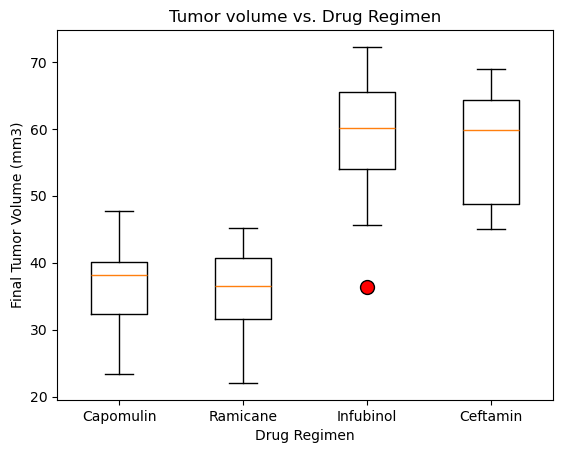

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, linestyle='none')

plt.boxplot(tumor_vol_data, labels=treatment_list, flierprops=flierprops)
plt.title('Tumor volume vs. Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.show()

## Line and Scatter Plots

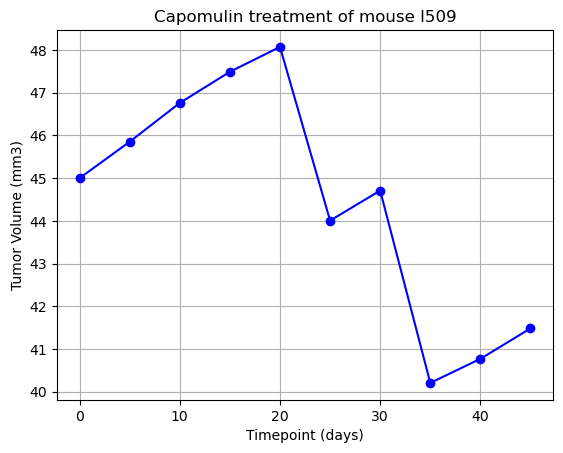

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == 'l509')]
plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')
plt.title('Capomulin treatment of mouse l509')
plt.grid(True)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

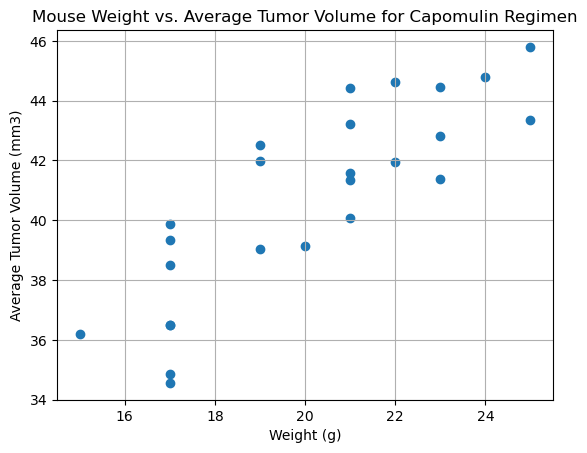

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Discovered a problem with my code - had to make sure my weight (g) and Tumor Volume (mm3) columns were numeric 
capomulin_data = combined_data[combined_data['Drug Regimen'] == 'Capomulin']
avg_tumor_volume = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()

# Generate the scatter plot
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.841936342469472


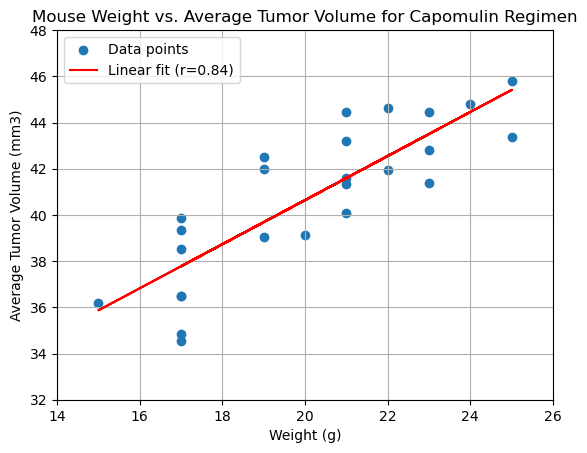

In [24]:
# Calculate the correlation coefficient and a linear regression model
correlation, _ = st.pearsonr(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")
# Calculate regression values
regress_values = avg_tumor_volume['Weight (g)'] * slope + intercept

# Plot scatter and regression line
plt.scatter(avg_tumor_volume['Weight (g)'], avg_tumor_volume['Tumor Volume (mm3)'], label='Data points')
plt.plot(avg_tumor_volume['Weight (g)'], regress_values, "r-", label=f'Linear fit (r={r_value:.2f})')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.grid(True)
plt.ylim(32, 48)
plt.xlim(14, 26)
plt.legend()
plt.show()
